In [35]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [10]:
data=pd.read_csv("/Users/user/Desktop/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [12]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

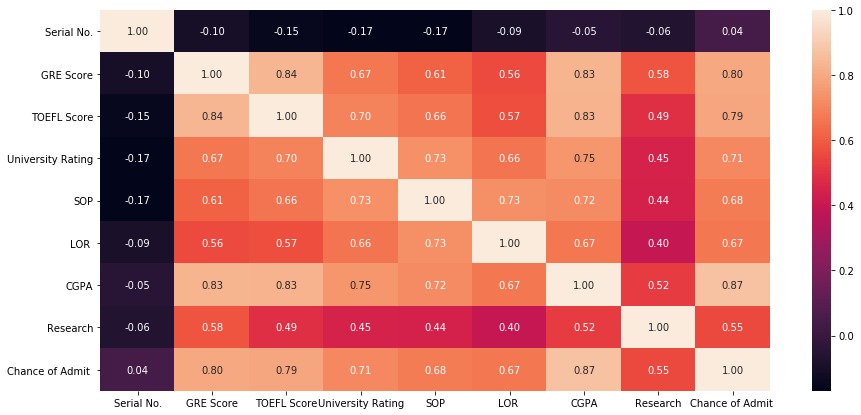

In [11]:
#Построим корреляционную матрицу
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    data, data['Research'], test_size=0.2, random_state=1)

In [28]:
sgd = SGDClassifier().fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [29]:
svm_svc = SVC(gamma='auto').fit(X_train, y_train)

In [30]:
decision_tree = DecisionTreeClassifier(random_state=1, max_depth=0.75).fit(X_train, y_train)

In [41]:
target_sgd = sgd.predict(X_test)
accuracy_score(y_test, target_sgd), \
precision_score(y_test, target_sgd),  \
recall_score(y_test, target_sgd)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.425, 0.0, 0.0)

In [42]:
target_svm_svc = svm_svc.predict(X_test)
accuracy_score(y_test, target_svm_svc), \
precision_score(y_test, target_svm_svc),  \
recall_score(y_test, target_svm_svc)

(0.65, 0.640625, 0.8913043478260869)

In [43]:
target_decision_tree = decision_tree.predict(X_test)
accuracy_score(y_test, target_decision_tree), \
precision_score(y_test, target_decision_tree),  \
recall_score(y_test, target_decision_tree)

(0.575, 0.575, 1.0)

In [44]:
#Подбор гиперпараметра с помошью GridSearchCV и кроссвалидации
scores_sgd = cross_val_score(SGDClassifier(), 
                         X_train, y_train, cv=2)
scores_sgd

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0.54037267, 0.5408805 ])

In [45]:
scores_svm_svc = cross_val_score(SVC(gamma='auto'), 
                         X_train, y_train, cv=2)
scores_svm_svc

array([0.54037267, 0.57232704])

In [46]:
scores_decision_tree = cross_val_score(DecisionTreeClassifier(), 
                         X_train, y_train, cv=2)
scores_decision_tree

array([1., 1.])

In [47]:
parameters = {'alpha':[0.5,0.4,0.3,0.2,0.1]}
clf_gs_sgd = GridSearchCV(SGDClassifier(), parameters, cv=2, scoring='accuracy')
clf_gs_sgd.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'alpha': [0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [48]:
clf_gs_sgd.best_params_

{'alpha': 0.5}

In [49]:
parameters = {'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
clf_gs_svm_svc = GridSearchCV(SVC(), parameters, cv=2, scoring='accuracy')
clf_gs_svm_svc.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'gamma': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [50]:
clf_gs_svm_svc.best_params_

{'gamma': 0.1}

In [51]:
parameters = {'min_impurity_decrease':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]}
clf_gs_decision_tree = GridSearchCV(DecisionTreeClassifier(), parameters, cv=2, scoring='accuracy')
clf_gs_decision_tree.fit(X_train, y_train)

GridSearchCV(cv=2, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_impurity_decrease': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [52]:
clf_gs_decision_tree.best_params_

{'min_impurity_decrease': 0.4}

In [53]:
sgd_new = SGDClassifier(alpha=0.5).fit(X_train, y_train)
svm_svc_new = SVC(gamma=0.1).fit(X_train, y_train)
decision_tree_new = DecisionTreeClassifier(random_state=1, min_impurity_decrease=0.4, max_depth=0.75).fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


In [56]:
target_sgd_new = sgd_new.predict(X_test)
accuracy_score(y_test, target_sgd_new), \
precision_score(y_test, target_sgd_new),  \
recall_score(y_test, target_sgd_new)

/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


(0.425, 0.0, 0.0)

In [58]:
target_svm_svc_new = svm_svc_new.predict(X_test)
accuracy_score(y_test, target_svm_svc_new), \
precision_score(y_test, target_svm_svc_new),  \
recall_score(y_test, target_svm_svc_new)

(0.675, 0.6666666666666666, 0.8695652173913043)

In [59]:
target_decision_tree_new = decision_tree_new.predict(X_test)
accuracy_score(y_test, target_decision_tree_new), \
precision_score(y_test, target_decision_tree_new),  \
recall_score(y_test, target_decision_tree_new)

(0.575, 0.575, 1.0)